In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
close = 'SURF'

# Data from Yahoo financce

In [3]:
df_stock = pd.read_excel('SURF_daily_2020-09-01_2021-09-30.xlsx')
df_stock.head()

,Date,SURF
0,2020-09-01,7.14
1,2020-09-02,6.98
2,2020-09-03,6.40
3,2020-09-04,6.06
4,2020-09-08,6.42


In [4]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    272 non-null    datetime64[ns]
 1   SURF    272 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.4 KB


# Stock Reports

In [5]:
df_text = pd.read_csv('final_merged_data.csv')
df_text = df_text[['Stock', 'Date', 'content', 'topic']]
df_text.head()

,Stock,Date,content,topic
0,AVXL,9/30/20,new york sept 10 2020 globe newswire anavex li...,anavex life science announces completion anave...
1,AVXL,10/31/20,clinically meaningful dosedependent statistica...,anavex life science announces positive result ...
2,AVXL,11/30/20,statistically significant improvement cdr syst...,proof concept controlled phase 2 clinical tria...
3,AVXL,12/31/20,primary safety pharmacokinetics secondary effi...,anavex life science announces anavex273 blarca...
4,AVXL,1/31/21,new york jan 11 2021 globe newswire anavex lif...,anavex life science receives michael j fox fou...


In [6]:
df_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Stock    52 non-null     object
 1   Date     52 non-null     object
 2   content  52 non-null     object
 3   topic    52 non-null     object
dtypes: object(4)
memory usage: 1.8+ KB


In [7]:
df_text = df_text[df_text['Stock']==close]
df_text.head()

,Stock,Date,content,topic
39,SURF,9/30/20,cambridge mass sept 11 2020 globe newswire sur...,surface oncology participate hc wainwright glo...
40,SURF,10/31/20,cambridge mass oct 26 2020 globe newswire surf...,surface oncology report srf388 preclinical dat...
41,SURF,11/30/20,program successfully escalated dose level demo...,surface oncology announces srf617 srf388 advan...
42,SURF,12/31/20,gsk exclusive right develop commercialize srf8...,surface oncology announces exclusive license a...
43,SURF,1/31/21,cambridge mass jan 11 2021 globe newswire surf...,surface oncology participate hc wainwright bio...


In [8]:
df_text['Date'] = pd.to_datetime(df_text['Date'])

# Merge

In [9]:
df = df_stock.merge(df_text[['Date', 'content', 'topic']], on = 'Date', how='left')
df.head(25)

,Date,SURF,content,topic
0,2020-09-01,7.14,NaN,NaN
1,2020-09-02,6.98,NaN,NaN
2,2020-09-03,6.40,NaN,NaN
3,2020-09-04,6.06,NaN,NaN
4,2020-09-08,6.42,NaN,NaN
5,2020-09-09,6.64,NaN,NaN
6,2020-09-10,6.70,NaN,NaN
7,2020-09-11,6.60,NaN,NaN
8,2020-09-14,7.12,NaN,NaN
9,2020-09-15,6.93,NaN,NaN


# Fill Missing using Forward Fill

In [10]:
df['content'] = df['content'].fillna(method='ffill')
df['topic'] = df['topic'].fillna(method='ffill')
df = df.fillna('No Report')
df.head(25)

,Date,SURF,content,topic
0,2020-09-01,7.14,No Report,No Report
1,2020-09-02,6.98,No Report,No Report
2,2020-09-03,6.40,No Report,No Report
3,2020-09-04,6.06,No Report,No Report
4,2020-09-08,6.42,No Report,No Report
5,2020-09-09,6.64,No Report,No Report
6,2020-09-10,6.70,No Report,No Report
7,2020-09-11,6.60,No Report,No Report
8,2020-09-14,7.12,No Report,No Report
9,2020-09-15,6.93,No Report,No Report


# Train Test Split

In [11]:
training_data_len = math.ceil(len(df)*0.8)
training_data_len

218

In [12]:
train_df = df.iloc[0:training_data_len, :]
train_df.head()

,Date,SURF,content,topic
0,2020-09-01,7.14,No Report,No Report
1,2020-09-02,6.98,No Report,No Report
2,2020-09-03,6.40,No Report,No Report
3,2020-09-04,6.06,No Report,No Report
4,2020-09-08,6.42,No Report,No Report


In [13]:
test_df = df.iloc[training_data_len-30:, :]
test_df.head()

,Date,SURF,content,topic
188,2021-06-02,8.83,cambridge mass april 09 2021 globe newswire su...,surface oncology present promising preclinical...
189,2021-06-03,9.06,cambridge mass april 09 2021 globe newswire su...,surface oncology present promising preclinical...
190,2021-06-04,8.17,cambridge mass april 09 2021 globe newswire su...,surface oncology present promising preclinical...
191,2021-06-07,7.90,cambridge mass april 09 2021 globe newswire su...,surface oncology present promising preclinical...
192,2021-06-08,7.69,cambridge mass april 09 2021 globe newswire su...,surface oncology present promising preclinical...


# Preprocessing

In [14]:
# Scaling
scaler = MinMaxScaler(feature_range=(0,1))
scaled_close = scaler.fit_transform(train_df.filter([close]).values)
scaled_close[0:5]

array([[0.14358973],
       [0.12307693],
       [0.04871797],
       [0.0051282 ],
       [0.05128207]])

# Get prices for last 30 days as feature and subsequent data as target

In [15]:
x_train = []
y_train = []

for i in range(30, len(train_df)):
  x_train.append(scaled_close[i-30:i, 0])
  y_train.append(scaled_close[i, 0])

  if i<=30:
    print(x_train)
    print(y_train)

[array([0.14358973, 0.12307693, 0.04871797, 0.0051282 , 0.05128207,
       0.07948717, 0.08717947, 0.07435897, 0.14102563, 0.11666665,
       0.08717947, 0.12307693, 0.15512822, 0.10000003, 0.05512819,
       0.0025641 , 0.        , 0.03717948, 0.06025639, 0.06153847,
       0.11282053, 0.12564103, 0.10897435, 0.15384614, 0.11153845,
       0.21410258, 0.19615388, 0.13974361, 0.43205134, 0.4230769 ])]
[0.43461538343975037]


# Process content


In [16]:
# Keeping from row 30 onwards
content = train_df.loc[30:,:]['content']

In [17]:
text_len = [len(text.split()) for text in content]

# Get description of text lengths
text_lengths_df = pd.DataFrame(text_len, columns=['Length'])
text_lengths_df.describe()

,Length
count,188.000000
mean,576.367021
std,212.203359
min,165.000000
25%,596.000000
50%,613.000000
75%,662.000000
max,1069.000000


In [18]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(content)
sequences = tokenizer.texts_to_sequences(content)

# Pad sequences
max_length = 350
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# Scale data
scaler_content = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler_content.fit_transform(padded_sequences)

In [19]:
X_train = np.column_stack((x_train, scaled_data))
len(X_train)

188

In [20]:
len(X_train[0])

380

# Prepare Test Data

In [21]:
scaled_close_test = scaler.transform(test_df.filter([close]).values)
scaled_close_test[:5]

array([[0.36025642],
       [0.38974366],
       [0.27564105],
       [0.24102566],
       [0.21410258]])

In [22]:
x_test = []
y_test = []

for i in range(30, len(test_df)):
  x_test.append(scaled_close_test[i-30:i, 0])
  y_test.append(scaled_close_test[i, 0])

  if i<=30:
    print(x_test)
    print(y_test)

[array([0.36025642, 0.38974366, 0.27564105, 0.24102566, 0.21410258,
       0.22179488, 0.2051282 , 0.1923077 , 0.1897436 , 0.1589744 ,
       0.16282052, 0.16282052, 0.1666667 , 0.11794873, 0.12051283,
       0.17307692, 0.18076922, 0.18333332, 0.18589742, 0.17820512,
       0.1846154 , 0.174359  , 0.15000002, 0.15128203, 0.11153845,
       0.14102563, 0.14102563, 0.12692311, 0.11153845, 0.06025639])]
[0.06410256645383217]


In [23]:
# Keeping from row 30 onwards
test_content = test_df.iloc[30:,:]['content']
test_content.shape

(54,)

In [24]:
test_sequences = tokenizer.texts_to_sequences(test_content)
test_padded_sequences = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')
test_scaled_data = scaler_content.fit_transform(test_padded_sequences)

In [25]:
X_test = np.column_stack((x_test, test_scaled_data))
len(X_test)

54

In [26]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_test, y_test = np.array(x_test), np.array(y_test)

In [27]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(188, 30, 1)

In [28]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(54, 30, 1)

In [29]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [30]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [31]:
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

188/188 [==============================] - 17s 45ms/step - loss: 0.0194


In [32]:
predictions = model.predict(x_test)

2/2 [==============================] - 4s 36ms/step


In [33]:
predictions = scaler.inverse_transform(predictions)

In [34]:
# Plotting
y_train_plot = scaler.inverse_transform(y_train.reshape(-1, 1))
train_plot = pd.DataFrame()
train_plot['y_train_plot'] = y_train_plot.flatten()
train_plot.reset_index(inplace=True, drop=True)
train_plot.tail()

,y_train_plot
183,7.12
184,7.12
185,7.01
186,6.89
187,6.49


In [35]:
y_test_plot = scaler.inverse_transform(y_test.reshape(-1, 1))
test_plot = pd.DataFrame()
test_plot['y_test_plot'] = y_test_plot.flatten()
test_plot['predictions'] = predictions
test_plot.index = range(len(train_plot)+1, len(train_plot)+1+len(test_plot))
test_plot.head()

,y_test_plot,predictions
189,6.52,7.648056
190,6.59,7.575974
191,6.44,7.506935
192,6.52,7.435222
193,6.72,7.372399


In [36]:
rmse = np.sqrt(np.mean((test_plot['predictions']-test_plot['y_test_plot'])**2))
rmse

0.860418252050737

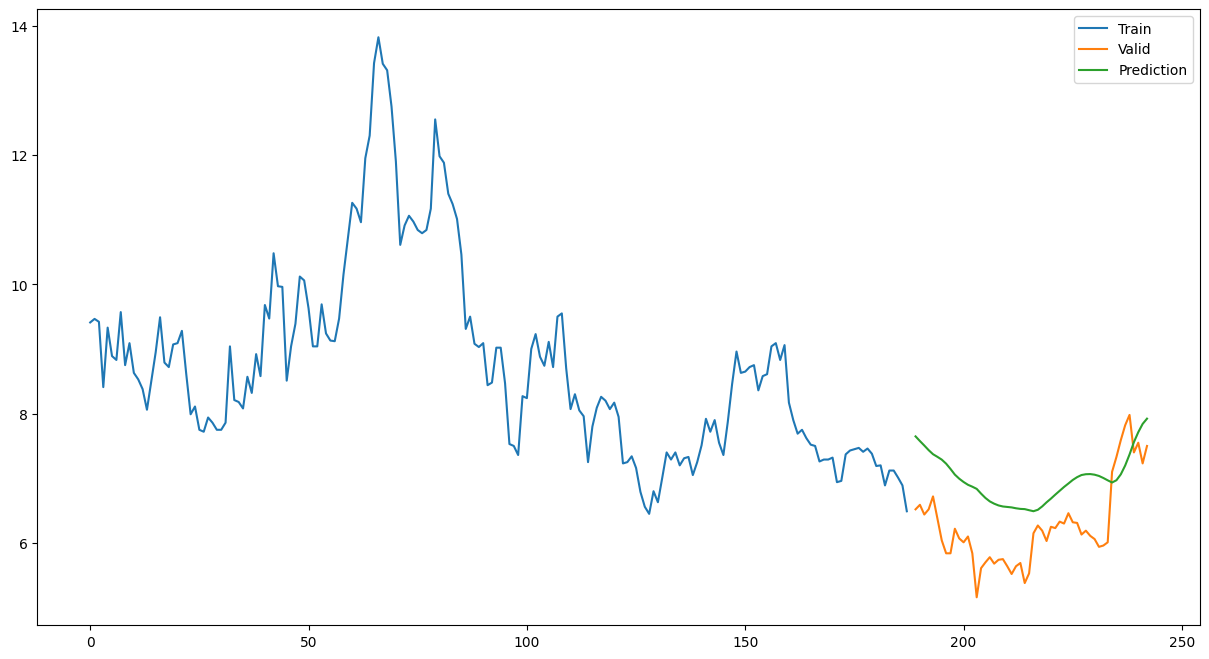

In [37]:
plt.figure(figsize=(15,8))
plt.plot(train_plot)
plt.plot(test_plot[['y_test_plot', 'predictions']])
plt.legend(['Train', 'Valid', 'Prediction'])
plt.show()